# Overview

The telecommunication industry plays a huge role in our daily lives thus stiff competition as the growth  and technology expands. While acquiring new customers is important, telecommunication companies recognize that retaining existing ones is even more crucial. Customer churn, is defined as the rate at which subscribers switch to competitors, is a major concern in this industry.

Customer retention prediction involves using data mining techniques to identify patterns in customer data that can predict churn. Techniques like hybrid models, decision trees, and Bayesian applications have been employed to address this challenge. This study focuses on developing a classifier to predict customer chrun propensity and to hlp companies in reducing amount of money lost in customer churn. 

## Problem Statement
The risk of loosing customers in the telecommunication industry is huge due to the economic times, increased of prices, advancement of technology, introduction of cheaper services etc. Customer churn affects not only the revenue of the companies but also the reputation. 
Given the fierce competition in the telecom sector, understanding the reasons behind customer departures, whether related to pricing, service quality, customer experience, or competitor tactics, is crucial. This analysis will enable SyriaTel to identify and rectify underlying problems, ultimately mitigating further churn and fostering long-term profitability and customer loyalty.

## Objectives
1. Identify the factors that contribute to customer churn
2. To build a model that predicts customer churn
3. To draw conclusions and recommendation for customer retention

# DATA UNDERSTANDING

The dataset 'Churn in Telecoms' was sourced from Kaggle and will be used to construct predictive models that aid the telecom industry in minimizing financial losses attributed to short-term customer retention.

There are 3333 records and 21 features in the data.

The columns included are:

    State: The location of the customer.
    Account Length: The number of days the account was held by the customer.
    Area Code: The area code of the customer.
    Phone Number: Phone number assigned to the user.
    International Plan: Indicator of whether the customer has an international plan.
    Voice Mail Plan: Indicator of whether the customer has a voicemail plan.
    Number Vmail Messages: Number of voicemails sent.
    Total Day Minutes: Number of minutes the customer has been in calls during the day.
    Total Day Calls: Total calls made during the day.
    Total Day Charge: Billed charge to the customer for all day calls.
    Total Eve Minutes: Number of minutes the customer has been in calls during the evening.
    Total Eve Calls: Total calls made during the evening.
    Total Eve Charge: Billed charge to the customer for all evening calls.
    Total Night Minutes: Number of minutes the customer has been in calls during the night.
    Total Night Calls: Total calls made during the night.
    Total Night Charge: Billed charge to the customer for all night calls.
    Total Intl Minutes: Total number minutes on international calls.
    Total Intl Calls: Total internation calls made.
    Total Intl Charge: Billed charge to the customer for all international calls.
    Customer Service Calls: Number of calls made to customer service.
    Churn: Indication of whether the customer terminated their contract.

In [38]:
# Import modules and Packages

# Data Handling and Visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Filter future Warnings
import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing
from sklearn.preprocessing import MinMaxScaler

# Model Training and Evaluation
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import numpy as np
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, f1_score, precision_score


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from sklearn.pipeline import Pipeline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

In [39]:
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [40]:
df.shape

(3333, 21)

In [41]:
#explore features and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The column designated as "churn" serves as our `target variable`, while the remaining columns are treated as `features`. This dataset offers a diverse range of information, encompassing customer demographics, service plans, call metrics, and churn indicators.

In [42]:
# Explore the column names
df.columns


Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [43]:
# Rename column titles to replace spaces with underscores
modified_columns = [col.replace(' ', '_') for col in df.columns]

# Update DataFrame with modified column names
df.columns = modified_columns

# Display the updated column names
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [44]:
# Numerical Columns
numerical_columns = df.select_dtypes(include='number').columns
print(f"Numerical Columns: {numerical_columns}\n")

# Categorical Columns
categorical_columns = df.select_dtypes(include='object').columns
print(f"Categorical Columns: {categorical_columns}")

Numerical Columns: Index(['account_length', 'area_code', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls'],
      dtype='object')

Categorical Columns: Index(['state', 'phone_number', 'international_plan', 'voice_mail_plan'], dtype='object')


In [45]:
df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [46]:
df.corr()


,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
account_length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area_code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
number_vmail_messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total_day_minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total_day_calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total_day_charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total_eve_minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total_eve_calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total_eve_charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
total_night_minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


# DATA PREPARATION
This step involves examining the dataframe for any anomalies. It's essential to thoroughly analyze the data to identify missing values, including placeholder or distinct values.

In [47]:
#check for missing values

df.isnull().sum()

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

In [48]:
#check for duplicates
df.duplicated().sum()

0

In [49]:
#drop unnecessary columns

df.drop(['phone_number'], axis=1, inplace=True)

## Distribution of Churn feature

In [50]:
# Calculate the distribution of the 'churn' column
churn_distribution_summary = df['churn'].value_counts()

# Print the churn distribution summary
print("Churn Distribution Summary:")
print(churn_distribution_summary)

Churn Distribution Summary:
False    2850
True      483
Name: churn, dtype: int64


Upon inspection, the presence of 2,850 false values denotes customers who stayed, while 483 true values represent those who left the company.

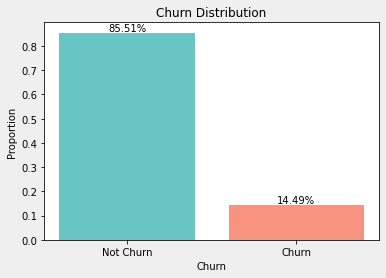

In [51]:
import matplotlib.pyplot as plt

# Set the background color
plt.figure(facecolor='#EFEFEF')

# Calculate churn distribution
churn_distribution = df['churn'].value_counts(normalize=True)

# Plot churn distribution
plt.bar(churn_distribution.index, churn_distribution.values, color=['#68C5C3', '#F7937F'])

# Annotate bars with representative values
for i, value in enumerate(churn_distribution):
    plt.text(i, value, f"{value:.2%}", ha='center', va='bottom')

# Set plot title and labels
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['Not Churn', 'Churn'])

# Show plot
plt.show()


In [52]:
#split to categorical and numrical features
# Split the Categorical columns from the Numerical Columns
numeric_features = df.select_dtypes(include=['number', 'float', 'int']).columns
categorical_features = df.select_dtypes(exclude=['number', 'float', 'int']).columns

## Distribution of Numerical Features

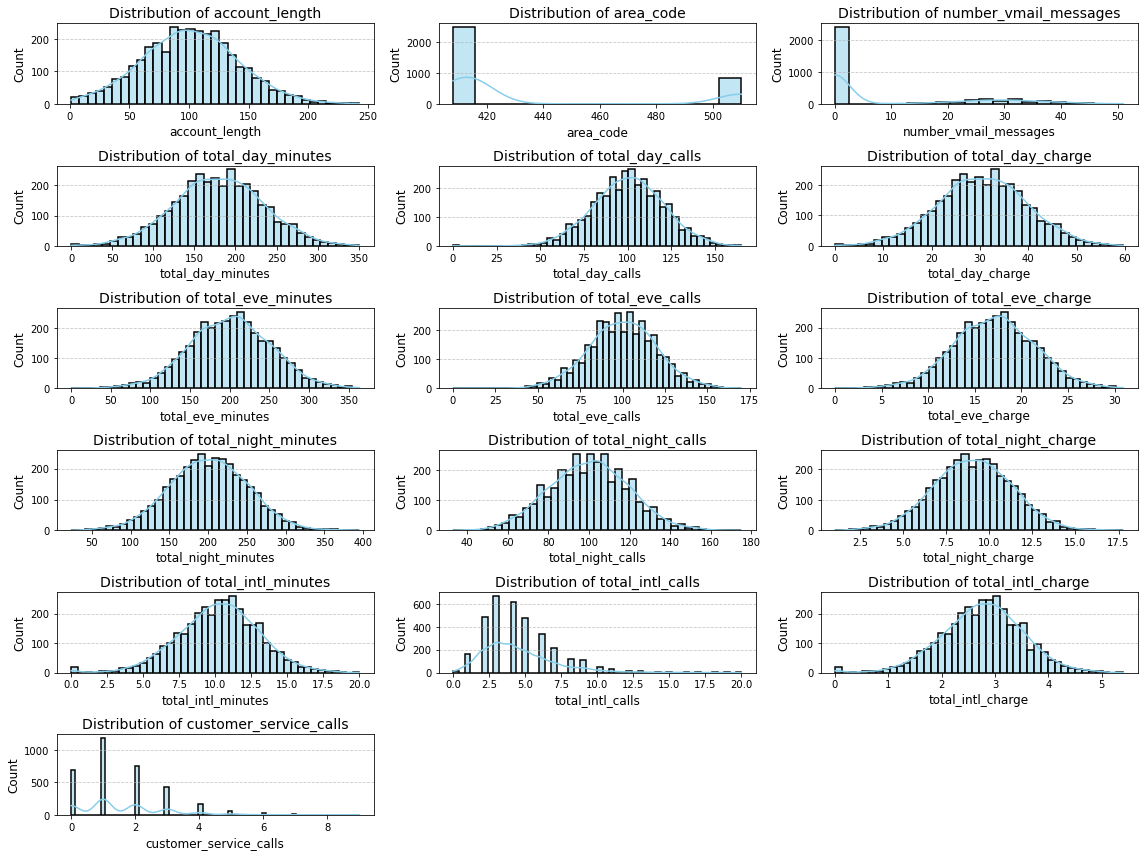

In [53]:
# Determine subplot layout
num_features = len(numeric_features)
rows = (num_features - 1) // 3 + 1
cols = min(3, num_features)

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 12))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot numeric features
for ax, feature in zip(axes, numeric_features):
    sns.histplot(df[feature], kde=True, ax=ax, color='skyblue', edgecolor='black', linewidth=1.5)
    ax.set_title(f'Distribution of {feature}', fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove any excess subplots
for ax in axes[num_features:]:
    fig.delaxes(ax)

# Adjust subplot layout
fig.tight_layout()

# Display the plot
plt.show()

## Outliers
By excluding outliers, we enhance the models' capacity to identify underlying patterns and generate more precise predictions on unseen data.The analysis will primarily target numeric data. Outliers have the potential to notably influence the efficacy of machine learning models, thereby affecting the feature engineering process.

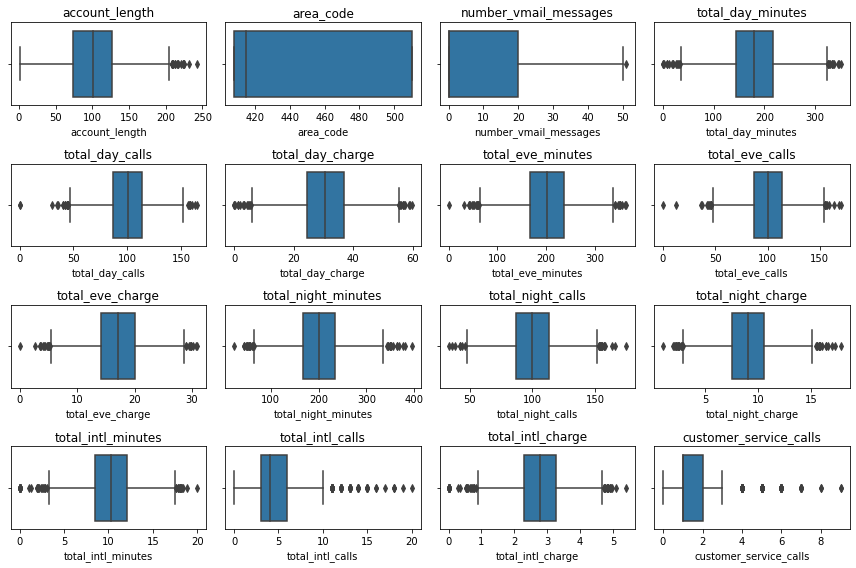

In [54]:
#visulaizing outliers for numeric columns
numeric_features = df.select_dtypes(include=['number', 'float', 'int']).columns.tolist()
# Set the figure size
plt.figure(figsize=(12, 8))

# Create box plots for each numerical column
for i, col in enumerate(numeric_features):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)

# Adjust subplot spacing
plt.tight_layout()

# Display the plot
plt.show()

## Correlation Matrix

In [55]:
df.corr()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
account_length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area_code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
number_vmail_messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total_day_minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total_day_calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total_day_charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total_eve_minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total_eve_calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total_eve_charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
total_night_minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


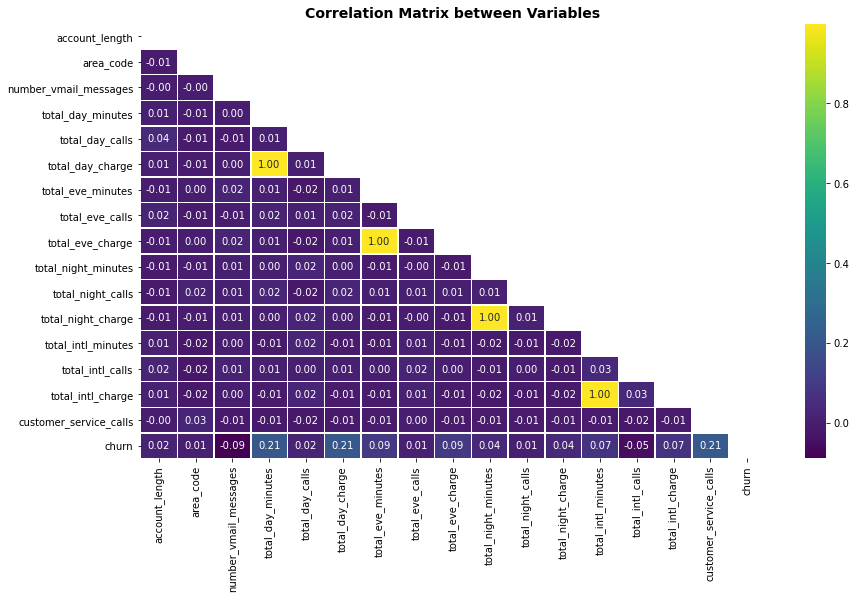

In [56]:
def plot_correlation_matrix(df):

    # Calculate the correlation matrix
    corr_matrix = df.corr()

    # Create a mask for the upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Set the figure size
    plt.figure(figsize=(14, 8))

    # Generate the correlation heatmap for the lower half
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)

    # Set the title of the plot
    plt.title('Correlation Matrix between Variables', fontsize=14, fontweight='bold')

    # Display the plot
    plt.show()

# Call the function to plot the lower half of the correlation matrix
plot_correlation_matrix(df)


In our multivariate analysis, we observed a generally low correlation between most features within the dataset. However, several pairs of features exhibited a perfect positive correlation, including:
- total evening charge and total evening minutes, 
- total day charge and total day minutes, 
- total night charge and total night minutes,
- total international charge and total international minutes. 

This perfect correlation was expected, given that the charge for a call is directly dependent on its duration. To mitigate multicollinearity concerns, one variable from each correlated pair needs to be dropped. Additionally, certain features like total day minutes, total day charge, and customer service calls displayed a weak positive correlation with churn, while others showed negligible correlation with churn. 

These findings underscore the need for careful consideration of feature selection to avoid multicollinearity issues and highlight the importance of multivariate analysis in understanding the intricate relationships between multiple variables and the target variable, customer churn.

## Multicollinearity
To address multicollinearity concerns there is need to identify highly correlated variables within the dataset to decide which ones to exclude, thereby circumventing problems like instability, overfitting, or imprecise coefficient estimates during model building. 

In [57]:
def get_high_correlations(df, threshold=0.75):
    
    # Calculate the absolute correlation matrix and stack it
    stacked_corr = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

    # Create a new column 'pairs' with tuples of variable names
    stacked_corr['pairs'] = list(zip(stacked_corr.level_0, stacked_corr.level_1))

    # Set 'pairs' as the index and drop the original variable name columns
    stacked_corr.set_index(['pairs'], inplace=True)
    stacked_corr.drop(columns=['level_0', 'level_1'], inplace=True)

    # Rename the correlation column as 'cc'
    stacked_corr.columns = ['cc']

    # Drop duplicates and select pairs with correlation higher than the threshold
    high_corr = stacked_corr[(stacked_corr.cc > threshold) & (stacked_corr.cc < 1)]

    return high_corr

# Call the function to get pairs of variables with high correlation
high_correlations = get_high_correlations(df)
high_correlations

,cc
pairs,
"(total_day_charge, total_day_minutes)",1.000000
"(total_day_minutes, total_day_charge)",1.000000
"(total_eve_minutes, total_eve_charge)",1.000000
"(total_eve_charge, total_eve_minutes)",1.000000
"(total_night_minutes, total_night_charge)",0.999999
"(total_night_charge, total_night_minutes)",0.999999
"(total_intl_charge, total_intl_minutes)",0.999993
"(total_intl_minutes, total_intl_charge)",0.999993


The variables (total day charge, total day minutes), (total eve minutes, total eve charge), (total night minutes, total night charge), and (total intl charge, total intl minutes) exhibit high correlation with each other. Therefore, for each pair, we will drop one variable to address this correlation.

In [58]:
## drop the highly correlated olumns
def drop_multicollinear_features(df, features_to_drop):
    """
    Drops specified features from the DataFrame to prevent multicollinearity.
    """
    # Drop the specified features
    df.drop(features_to_drop, axis=1, inplace=True)

    return df

# Define the features to drop
features_to_drop = ['total_day_charge', 'total_eve_minutes', 'total_night_charge','total_intl_minutes']

# Call the function to drop the features
df = drop_multicollinear_features(df, features_to_drop)

## Label Encoding
Label encoding is a process where we transform categorical variables to numerical variables. Each category is assigned a unique numerical label. This will assist in the training of the model.

In [59]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to convert
categorical_cols = ['state', 'international_plan', 'voice_mail_plan']

# Convert each categorical column to numerical
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

## One Hot Encoding
It is a technique used to convert categorical variables into a binary format. 

In [60]:
import pandas as pd

def apply_one_hot_encoding(df, columns):
    """
    Applies one-hot encoding to the specified columns in the DataFrame.
    """
    # Drop the 'state' column if it exists in the DataFrame
    if 'state' in df.columns:
        df.drop('state', axis=1, inplace=True)
    
    # Apply one-hot encoding to the specified columns
    df = pd.get_dummies(df, columns=columns)

    return df

# Define the columns to apply one-hot encoding to
columns_to_encode = ['area_code', 'international_plan', 'voice_mail_plan']

# Call the function to apply one-hot encoding
df = apply_one_hot_encoding(df, columns_to_encode)

# Display the first few rows of the DataFrame
df.head()


,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_intl_calls,total_intl_charge,customer_service_calls,churn,area_code_408,area_code_415,area_code_510,international_plan_0,international_plan_1,voice_mail_plan_0,voice_mail_plan_1
0,128,25,265.1,110,99,16.78,244.7,91,3,2.70,1,False,0,1,0,1,0,0,1
1,107,26,161.6,123,103,16.62,254.4,103,3,3.70,1,False,0,1,0,1,0,0,1
2,137,0,243.4,114,110,10.30,162.6,104,5,3.29,0,False,0,1,0,1,0,1,0
3,84,0,299.4,71,88,5.26,196.9,89,7,1.78,2,False,1,0,0,0,1,1,0
4,75,0,166.7,113,122,12.61,186.9,121,3,2.73,3,False,0,1,0,0,1,1,0


## Scaling the data

Scaling the data is a crucial preprocessing step to ensure that all features have a similar scale. This is particularly important for machine learning algorithms that rely on distance calculations, such as K-nearest neighbors.

In [61]:
import numpy as np

def scale_numerical_features(df):
    """
    Scales numerical features in the DataFrame using MinMaxScaler.
    """
    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # Define function for scaling a column
    def scale_column(column):
        return scaler.fit_transform(df[[column]])

    # Iterate through numerical columns and scale them
    for column in df.select_dtypes(include=[np.number]).columns:
        df[[column]] = scale_column(column)

    return df

# Call the function to scale the numerical features
df = scale_numerical_features(df)

# Display the first few rows of the DataFrame
df.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_intl_calls,total_intl_charge,customer_service_calls,churn,area_code_408,area_code_415,area_code_510,international_plan_0,international_plan_1,voice_mail_plan_0,voice_mail_plan_1
0,0.524793,0.490196,0.755701,0.666667,0.582353,0.542866,0.595750,0.408451,0.15,0.500000,0.111111,False,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.438017,0.509804,0.460661,0.745455,0.605882,0.537690,0.621840,0.492958,0.15,0.685185,0.111111,False,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.561983,0.000000,0.693843,0.690909,0.647059,0.333225,0.374933,0.500000,0.25,0.609259,0.000000,False,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.342975,0.000000,0.853478,0.430303,0.517647,0.170171,0.467187,0.394366,0.35,0.329630,0.222222,False,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.305785,0.000000,0.475200,0.684848,0.717647,0.407959,0.440290,0.619718,0.15,0.505556,0.333333,False,0.0,1.0,0.0,0.0,1.0,1.0,0.0


## Train-Test Split

In [62]:
# Define the target variable and the feature matrix
y = df['churn']  
X = df.drop('churn', axis=1)  

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the split data
print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Train set size: 2666
Test set size: 667


In [63]:
scoring_keeper = []

def scoring_function(name, model, splits=0.2):
    """
    This function only requires a model.
    
    The function will fit it by itself and provide metrics for the SMOTE dataset and non-SMOTE dataset
    """    
    X_train_resampled, X_test_preprocessed, y_train_resampled, y_test = preprocessing(test_size=splits)
    
    smote_model = model.fit(X_train_resampled, y_train_resampled)
    
    # Predict X train and X Test
    smote_train_pred = smote_model.predict(X_train_resampled)
    smote_test_pred = smote_model.predict(X_test_preprocessed)

    cross_val_scores_smote = cross_val_score(smote_model, X_train_resampled, y_train_resampled).mean()

    # Compare model scores
    print(f"""
    Metrics
        Train Accuracy Score: {accuracy_score(y_train_resampled, smote_train_pred)}
        Test Accuracy Score: {accuracy_score(y_test, smote_test_pred)}
        Train Recall Score: {recall_score(y_train_resampled, smote_train_pred)}
        Test Recall Score: {recall_score(y_test, smote_test_pred)}
    """)
    
    # Keep a record of the results
    scoring_keeper.append(
        {'name':name, 'model':model,
         'Accuracy': round(accuracy_score(y_test, smote_test_pred), 4),
         'CV Score': round(cross_val_scores_smote, 4),
         'Recall': round(recall_score(y_test, smote_test_pred), 4)
        }
    )

In [64]:
from imblearn.over_sampling import SMOTE

# Create a SMOTE object
smote = SMOTE(random_state=42)

# Fit SMOTE on the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Now, X_train_smote and y_train_smote are the feature matrix and target variable of the oversampled training data
print("Shape of X_train_smote:", X_train_smote.shape)
print("\nValue counts of y_train_smote:\n", y_train_smote.value_counts())


Shape of X_train_smote: (4568, 18)

Value counts of y_train_smote:
 True     2284
False    2284
Name: churn, dtype: int64


 ## 5. Modeling

The primary objective is to identify the optimal model and parameter configurations that yield the highest predictive accuracy. The approach involves creating multiple models, rigorously evaluating their performance, and fine-tuning hyperparameters to enhance model efficacy. The recall score metric is prioritized, aiming for a threshold of 80% or higher to signify a successful model. By iteratively refining the models and techniques, the aim is to build a robust predictive framework capable of effectively identifying potential churners and informing strategic business decisions.

Some of the models used include
1. Logistic Regression
2. Decision Trees
3. Random Forrest Classifier
4. XG Boost



## Logistic Regression

Logistic regression is a statistical technique commonly used for binary classification tasks. It is specifically designed for situations where the outcome variable is binary, taking only two possible values. The main objective of logistic regression is to estimate the probability of an observation belonging to a specific class, utilizing the values of independent variables as predictors.

A limitation of the Logistic Regresion is that it always assumes linearity between the independent and dependent features, and may at times fail to fully capture complex relationships.

In [65]:
# Construct a pipeline for preprocessing and logistic regression modeling
model_pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(transformers=[('num', StandardScaler(), X.columns)])),
    ('classifier', LogisticRegression())
])

# Execute k-fold cross-validation on the training set
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model_pipeline, X_train, y_train, cv=k_fold, scoring='accuracy')

# Display cross-validation scores and mean CV accuracy
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Train the model on the training data
model_pipeline.fit(X_train, y_train)

# Generate predictions for the train and test data
y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)

# Compute the accuracy of the model for train and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Output the train and test scores
print(f"\nTrain Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Print the classification report for test data
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

Cross-validation scores: [0.84831461 0.86491557 0.84427767 0.85741088 0.89305816]
Mean CV accuracy: 0.8615953791344308

Train Accuracy: 0.86
Test Accuracy: 0.86

Classification Report (Test Data):
              precision    recall  f1-score   support

       False       0.87      0.98      0.92       566
        True       0.60      0.18      0.27       101

    accuracy                           0.86       667
   macro avg       0.73      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667



The model's overall accuracy is 86%, performing slightly better on training data (87%) than test data (86%).

Model Evaluation Summary:

- Precision: Precision for class 0 (not churned) is 87%
- Recall: Recall for class 0 (not churned) is 97%
- F1-score: The F1-score for class 0 (not churned) reaches 92%

Confusion matrix was further done to visualize the results.


Confusion Matrix (Test Data):
[[554  12]
 [ 83  18]]


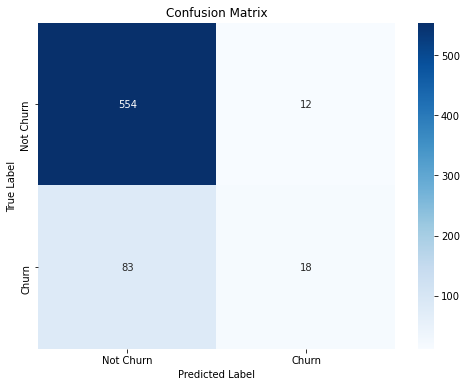

In [66]:
# Import necessary libraries
import seaborn as sns

# Compute the confusion matrix for test data
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrix
print("\nConfusion Matrix (Test Data):")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', 
            xticklabels=['Not Churn', 'Churn'], 
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Confusion Matrix Analysis:

In the confusion matrix, there are a total of 667 samples in the test set.

- True Positives (TP): The model accurately predicted 18 samples as "Not churned" (class 0).
- True Negatives (TN): The model correctly identified 554 samples as "churned" (class 1).
- False Positives (FP): The model inaccurately classified 12 samples as "churned" when they were not churned.
- False Negatives (FN): The model misclassified 83 samples as "not churned" when they were indeed churned.

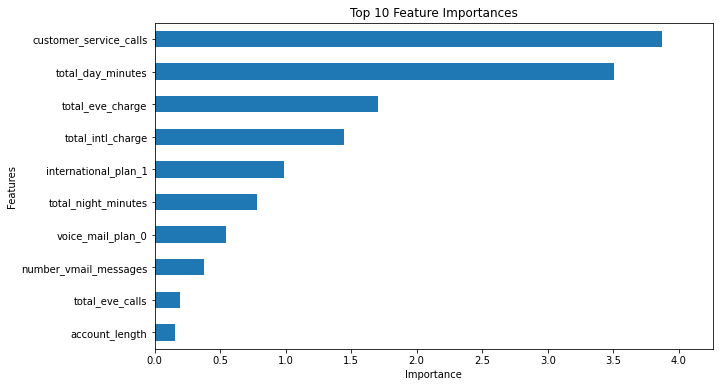

In [67]:
# Instantiate and fit the logistic regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Retrieve coefficients
coefficients = logistic_regression_model.coef_[0]

# Extract feature importances
feature_names = X_train.columns
feature_importances = pd.Series(coefficients, index=feature_names)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot top 10 feature importances
plt.figure(figsize=(10, 6))
top_features = feature_importances[:10]
top_features.sort_values().plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.xlim(0, max(top_features) * 1.1)
plt.show()

Customer service calls, total day minutes and total eve charge were the three top features considering in the model.

## Decision Trees
Decision trees are used to solve classification problems and categorize objects depending on their learning features. They are simple to use, handle unbalanced data well, and can handle missing values.

Howeveer, Decision Trees are prone to overfitting and are very sensitive to any changes to the data.

In [69]:
# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the Model
clf.fit(X_train, y_train)

# Make Predictions
y_pred = clf.predict(X_test)

In [70]:
# Evaluate the model's performance
clf_accuracy = accuracy_score(y_test, y_pred)
clf_precision = precision_score(y_test, y_pred)
clf_recall = recall_score(y_test, y_pred)
clf_f1 = f1_score(y_test, y_pred)

print('Accuracy ', clf_accuracy)
print('Precision ', clf_precision)
print('Recall ', clf_recall)
print('f1_Score ', clf_f1)

#Calculate train and test scores
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print('train score ', train_score)
print('test score ', test_score)

Accuracy  0.9100449775112444
Precision  0.6915887850467289
Recall  0.7326732673267327
f1_Score  0.7115384615384615
train score  1.0
test score  0.9100449775112444


In [71]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train a Decision Tree Classifier on the oversampled data
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Specify average parameter
recall = recall_score(y_test, y_pred, average='weighted')  # Specify average parameter
f1 = f1_score(y_test, y_pred, average='weighted')  # Specify average parameter

print('Accuracy ', accuracy)
print('Precision ', precision)
print('Recall ', recall)
print('f1_Score ', f1)

# Generate and print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy  0.8740629685157422
Precision  0.8851917243630478
Recall  0.8740629685157422
f1_Score  0.8786032805102406

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.91      0.92       566
        True       0.57      0.68      0.62       101

    accuracy                           0.87       667
   macro avg       0.76      0.80      0.77       667
weighted avg       0.89      0.87      0.88       667



Decision Trees achieves a recall score of 0.87 which suggests that the model accurately identifies approximately 87% of positive instances.


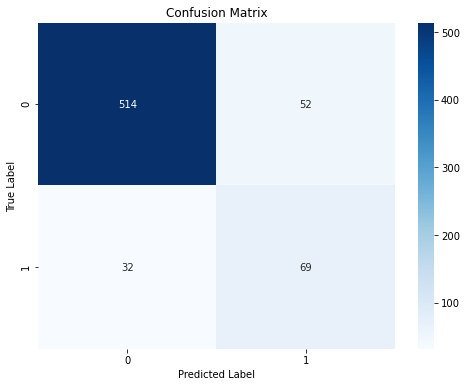

In [72]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix represents the performance of a classification model.

- The top left cell with the number “514” represents True Negatives. This means that the model correctly predicted 514 instances as class 0 (Negative).
- The top right cell with the number “52” represents False Positives. This means that the model incorrectly predicted 52 instances as class 1 (Positive) when they were actually class 0 (Negative).
- The bottom left cell with the number “26” represents False Negatives. This means that the model incorrectly predicted 26 instances as class 0 (Negative) when they were actually class 1 (Positive).
- The bottom right cell with the number “75” represents True Positives. This means that the model correctly predicted 75 instances as class 1 (Positive).

From this, we can infer that the model is doing a good job but might need to be adjusted to improve its performancwe. This could involve tuning hyperparameters, using a different algorithm, or gathering more representative data for class 1.

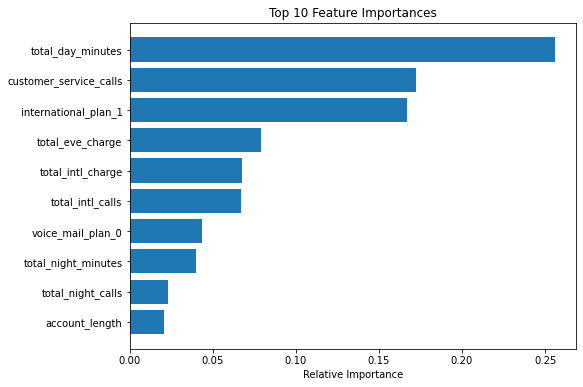

In [73]:
# Get feature importances
importances = clf.feature_importances_

# Get the indices of the features sorted by importance
indices = np.argsort(importances)[-10:]  # Get the indices of the top 10 features

# Get the names of the features
feature_names = X_train.columns.tolist()

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.title('Top 10 Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Random Forest Classifier
Random forest is a flexible, easy-to-use machine learning algorithm, that is both simple and diverse. During training, it creates numerous decision trees and derives a prediction or regression value by averaging the outputs of these individual trees.

Some limitations of the Random Forest are that it can't describe the relationship between the data. Increasing accuracy might come with the additional cost of having many trees which slows down the model execution time.

In [74]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the standard scaler
scaler = StandardScaler()

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Classifier Initialization
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf.predict(X_test_scaled)

In [75]:
# Performance Evaluation
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred, average='weighted')  # Specify average parameter
recall_rf = recall_score(y_test, y_pred, average='weighted')  # Specify average parameter
f1_rf = f1_score(y_test, y_pred, average='weighted')  # Specify average parameter

# Print evaluation metrics
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)

Accuracy: 0.9400299850074962
Precision: 0.9401369549339043
Recall: 0.9400299850074962
F1-score: 0.9352100784053092


In [76]:
# Train and Test Scores
train_score = rf.score(X_train_scaled, y_train)
test_score = rf.score(X_test_scaled, y_test)

print("Train score:", train_score)
print("Test score:", test_score)

Train score: 1.0
Test score: 0.9400299850074962


In [77]:
# Cross-validation to address overfitting
k = 5  # Number of folds
cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=k, scoring='accuracy')

# Cross-Validation Accuracy
accuracy_rf_cv = np.mean(cv_scores)

# Print cross-validation accuracy
print("Cross-Validation Accuracy:", accuracy_rf_cv)

Cross-Validation Accuracy: 0.9489891856567658


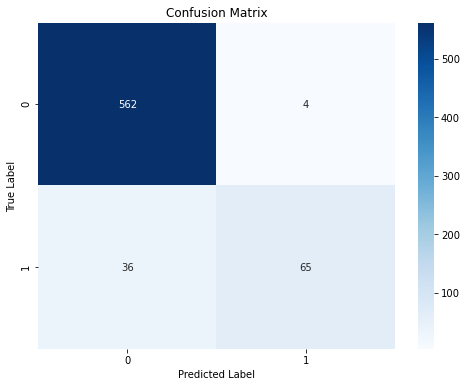

In [78]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [79]:

# Generate predictions using the random forest classifier
y_pred_rf = rf.predict(X_test_scaled)

# Import necessary libraries for the classification report
from sklearn.metrics import classification_report

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.99      0.97       566
        True       0.94      0.64      0.76       101

    accuracy                           0.94       667
   macro avg       0.94      0.82      0.87       667
weighted avg       0.94      0.94      0.94       667



The random forest classifier achieves a recall score of 0.64, a significant improvement over the decision trees model. This suggests that the model accurately identifies approximately 64% of positive instances.

Evaluation via the confusion matrix reveals a notable prevalence of true positives and true negatives compared to false positives and false negatives. This suggests the model's predictions are predominantly accurate and not prone to overfitting.


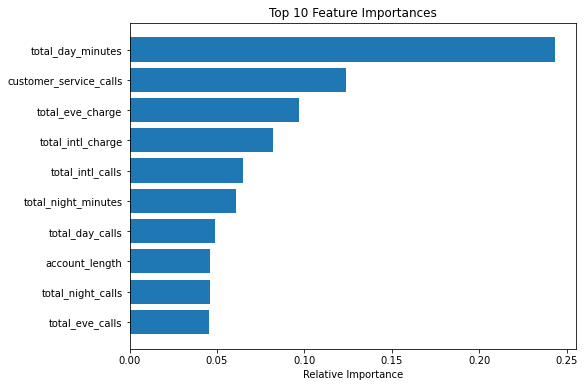

In [80]:
# Get feature names
feature_names = list(X_train.columns)

# Get feature importances
importances = rf.feature_importances_

# Get indices of top 10 features
top_indices = np.argsort(importances)[-10:]

# Plot feature importances
plt.figure(figsize=(8,6))
plt.barh(range(len(top_indices)), importances[top_indices], align='center')
plt.yticks(range(len(top_indices)), [feature_names[i] for i in top_indices])
plt.xlabel('Relative Importance')
plt.title('Top 10 Feature Importances')
plt.show()


The model highlights total day charge, total intl calls, and total eve charge as its top three most influential features.

## XG Boost

XGBoost, short for Extreme Gradient Boosting, stands out as a robust machine learning algorithm suitable for both regression and classification tasks. Leveraging gradient boosting and ensemble learning methodologies, it merges numerous weak models, often decision trees, to form a potent predictive model.

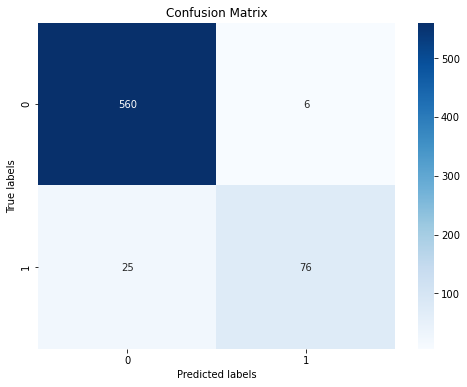

In [81]:
from xgboost import XGBClassifier

# Instantiate XGBClassifier
xg_clf = XGBClassifier(random_state=42)

# Fit the model on the training data
xg_clf.fit(X_train, y_train)

#predict on the test data
y_pred_xg = xg_clf.predict(X_test)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming xg_clf is your trained XGBoost model
y_pred_xg = xg_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_xg)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()


From the confusion matrix, it is evident that the model produces more true positive and negatives than false.This indicates that the model's prediction accuracy outweighs its inaccuracies, thus not prone to overfitting

In [82]:
print(classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

       False       0.96      0.99      0.97       566
        True       0.93      0.75      0.83       101

    accuracy                           0.95       667
   macro avg       0.94      0.87      0.90       667
weighted avg       0.95      0.95      0.95       667



The XG Boost model has a recall score is 0.75, suggesting it can accurately identify about 75% of positive instances

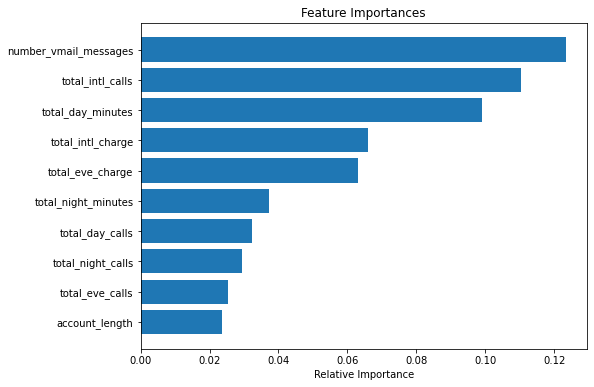

In [83]:
feature_names = list(X_train.columns)
importances = xg_clf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

the model identifies total international calls, the number of voicemail messages and total day charge, as the top three most influential features.

### 6.2 Model Tuning

After assessing the models using recall scores and ROC AUC, it's evident that both the XGBoost classifier and the RandomForest classifier exhibit promising performance. To enhance their effectiveness further, fine-tuning via GridSearch can be employed.

In [84]:
## Tuning Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None] + list(randint(10, 50).rvs(size=5)),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'bootstrap': [True, False]
}

# Initialize the randomized search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, cv=3, n_jobs=-1, verbose=2, random_state=42)

# Fit the randomized search
random_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = random_search.best_params_

# Train the classifier with the best parameters
rf_best = RandomForestClassifier(**best_params)
rf_best.fit(X_train_scaled, y_train)

# Make predictions with the tuned model
y_pred_best = rf_best.predict(X_test_scaled)

# Evaluate the performance of the tuned model
accuracy_rf_best = accuracy_score(y_test, y_pred_best)
precision_rf_best = precision_score(y_test, y_pred_best, average='weighted')
recall_rf_best = recall_score(y_test, y_pred_best, average='weighted')
f1_rf_best = f1_score(y_test, y_pred_best, average='weighted')

# Print the performance metrics of the tuned model
print("Accuracy (tuned):", accuracy_rf_best)
print("Precision (tuned):", precision_rf_best)
print("Recall (tuned):", recall_rf_best)
print("F1 Score (tuned):", f1_rf_best)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
# Create an instance of the RandomForest classifier with best params
rf_tuned = RandomForestClassifier(criterion = 'entropy',
                                  max_depth = best_params['max_depth'],
                                  min_samples_split = best_params['min_samples_split'],
                                  n_estimators = best_params['n_estimators'],
                                  bootstrap = best_params['bootstrap'],
                                  random_state=123)

# Fit the model on the training data
rf_tuned.fit(X_train_smote, y_train_smote)

In [ ]:
#Predict on the test data
y_pred_tuned = rf_tuned.predict(X_test)

# Predict on the test data using the tuned RandomForest classifier
y_pred_tuned = rf_tuned.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_tuned)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#print the classification report
print(classification_report(y_test,y_pred_tuned))

In [ ]:
# Get the predicted probabilities for the positive class
y_proba = rf_tuned.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Tuning XG Boost

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Create an instance of Random Forest Classifier
rf = RandomForestClassifier(random_state=123)

# Create GridSearchCV object
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='recall', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search_rf.fit(X_train, y_train)

# Print the best parameters
print(grid_search_rf.best_params_)


In [ ]:
#Create an instance of XGBoost Classifier with best params
xgb_tuned = XGBClassifier(learning_rate = 0.1,
                          max_depth = 10,
                          min_child_weight = 1,
                          n_estimators = 100,
                          subsample = 0.5,
                          random_state = 123)

#Fit on the training data
xgb_tuned.fit(X_train, y_train)

#Predict on the test data
y_pred_xgt = xgb_tuned.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test data
y_pred_xgt = xgb_tuned.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_xgt)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#Classification report
print(classification_report(y_test, y_pred_xgt))

In [ ]:
# Get the predicted probabilities for the positive class
y_proba = xgb_tuned.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for XGB classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Define the data
data = {
    'Model': ['Random Forest', 'Decision Tree', 'XGBoost'],
    'Recall': [0.6436, 0.7228, 0.7624],
    'Precision': [0.85, 0.96, 0.93],
    'F1-Score': [0.73, 0.82, 0.82],
    'Accuracy': [0.94, np.nan, 0.95]  # Replace 'N/A' with np.nan
}

# Create a DataFrame
df = pd.DataFrame(data)

# Function to highlight the maximum value in each column
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: #68C5C3' if v else '' for v in is_max]

# Apply the function to the DataFrame
df.style.apply(highlight_max, subset=['Recall', 'Precision', 'F1-Score', 'Accuracy'])


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Initialize the classifiers
lg = LogisticRegression(class_weight='balanced')
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
rf = rf_tuned  # Assuming rf_tuned is your tuned RandomForestClassifier
xgb = xgb_tuned  # Assuming xgb_tuned is your tuned XGBClassifier

classifiers = [lg, dt, rf, xgb]
names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']

# Fit and transform the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(8, 6))

# Loop through each classifier and plot its ROC curve
for clf, name in zip(classifiers, names):
    clf.fit(X_train_scaled, y_train)
    y_prob = clf.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, label='ROC Curve ({} AUC = {:.2f})'.format(name, roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


The Random Forest model has the highest AUC value, indicating that it has the best performance among the four models according to this metric. The Logistic Regression model has the lowest AUC value, indicating that it has the worst performance among the four models according to this metric. The Decision Tree and XGBoost models have similar performance, with AUC values close to 0.9.

In [ ]:
feature_names = list(X_train.columns)
importances = xgb_tuned.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Conclusion

XGBoost and RandomForest models gave us a great results. After hyperparameter tuning and picking the right train-test split value, the RandomForest gave us the metrics we required as per the objectives we set out to achieve.
SyriaTel should prioritize the Random Forest Classifier as the primary model for predicting customer churn due to its superior overall performance and ability to accurately identify potential churners.

## Reccommendations

The analysis identified key factors significantly impacting customer churn prediction (Feature Importance):

- Call minutes and charges (daytime, evening, international)
- Customer service calls
- Usage of value-added services (voicemail plan)

Based on these insights, SyriaTel should implement strategic customer retention efforts that address these factors:

- Personalized offers and discounts: Target customers based on their usage patterns (e.g., high day charges) with relevant incentives.
- Reduce customer service calls: Invest in strategies like interactive voice response (IVR) systems to improve customer experience and decrease churn associated with frequent calls.
- Train customer care agents that ty follow a guidline to ensure customers feel heard and understood
- Improve theservices they offer in terms of price and also customer problem resolution
- SyriaTel should encourage collection of feedback from customers for continous re-evaluation